# Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read dataset

In [2]:
df = pd.read_csv('Weight_Height.csv')

In [3]:
df.head()

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
3,71.73,220.04
4,69.88,206.35


In [4]:
df.shape

(3501, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024324,186.891351
std,2.858628,19.903136
min,59.380000,65.780000
25%,67.190000,173.900000
50%,69.040000,187.310000
75%,70.980000,200.360000
max,79.000000,269.990000


# Scatter plot

Text(0.5, 1.0, 'Co-relation of height vs weight')

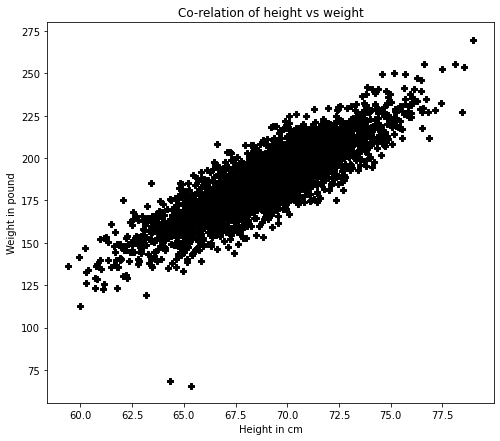

In [7]:
plt.figure(figsize=(8,7))
plt.scatter(df['Height'],df['Weight'], color='black', marker="P")
plt.xlabel('Height in cm')
plt.ylabel('Weight in pound')
plt.title('Co-relation of height vs weight')

# Check mean

In [8]:
df.Height.mean()

69.02432447872032

In [9]:
df.Weight.mean()

186.8913510425599

# Cleck the length of dataset

In [10]:
len(df.Height)

3501

In [11]:
len(df.Weight)

3501

# Rename the dataset as x and y

In [12]:
x = df[['Height']]
y = df['Weight']

# Split Dataset

In [13]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.60)

In [14]:
xtrain.shape

(1400, 1)

In [15]:
ytrain.shape

(1400,)

In [16]:
xtrain.head()

,Height
2672,68.18
287,69.16
3173,70.96
1215,68.67
3498,73.91


In [17]:
ytrain.head()

2672    172.96
287     195.90
3173    202.12
1215    178.17
3498    202.43
Name: Weight, dtype: float64

# Applying the Linear_regression model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [21]:
lr.coef_

array([6.01951463])

In [22]:
lr.intercept_

-228.47954526099312

In [23]:
lr.predict(df[['Height']])

array([216.06161033, 185.54267115, 217.62668414, ..., 216.42278121,
       177.23574095, 209.37994909])

In [24]:
df['Predicted Weight'] = lr.predict(df[['Height']])

In [25]:
df

,Height,Weight,Predicted Weight
0,73.85,241.89,216.061610
1,68.78,162.31,185.542671
2,74.11,212.74,217.626684
3,71.73,220.04,203.300239
4,69.88,206.35,192.164137
...,...,...,...
3496,69.30,185.65,188.672819
3497,70.54,210.20,196.137017
3498,73.91,202.43,216.422781
3499,67.40,144.28,177.235741


In [26]:
df.head()

,Height,Weight,Predicted Weight
0,73.85,241.89,216.061610
1,68.78,162.31,185.542671
2,74.11,212.74,217.626684
3,71.73,220.04,203.300239
4,69.88,206.35,192.164137


In [27]:
testing = lr.predict(xtest)

In [28]:
testing

array([204.08277621, 201.73516551, 208.95858307, ..., 206.30999663,
       179.52315652, 189.15437993])

In [29]:
ytest

1101    196.35
960     196.54
2745    219.10
358     167.70
2173    206.73
         ...  
2565    200.91
1519    204.22
998     202.14
1229    190.73
1098    197.28
Name: Weight, Length: 2101, dtype: float64

In [30]:
xtest['pred'] = lr.predict(xtest)

C:\Users\MY\AppData\Local\Temp/ipykernel_1136/3049945434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['pred'] = lr.predict(xtest)


In [31]:
xtest

,Height,pred
1101,71.86,204.082776
960,71.47,201.735166
2745,72.67,208.958583
358,66.76,173.383252
2173,69.26,188.432038
...,...,...
2565,72.12,205.647850
1519,69.72,191.201015
998,72.23,206.309997
1229,67.78,179.523157


In [32]:
xtest = xtest[['Height']]

# Check statistical indices

In [33]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
mse = mean_squared_error(ytest, pred)

In [34]:
mse

105.69407732570848

In [35]:
from sklearn.metrics import mean_absolute_error
pred = lr.predict(xtest)
mae = mean_absolute_error(ytest, pred)

In [36]:
mae

8.038170562796

Text(0.5, 1.0, 'Co-relation of Height vs Weight')

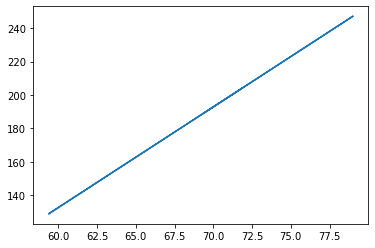

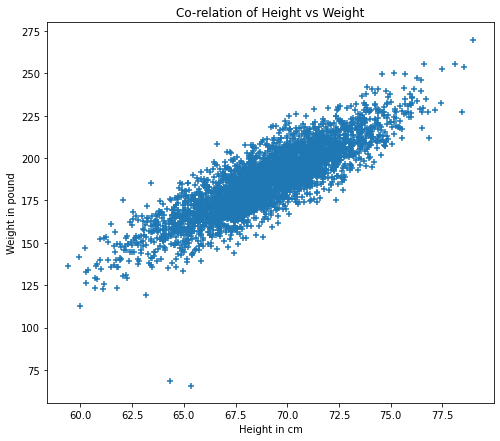

In [37]:
plt.plot(xtest, lr.predict(xtest))
plt.figure(figsize=(8,7))
plt.scatter(df['Height'], df['Weight'], marker='+')
plt.xlabel('Height in cm')
plt.ylabel('Weight in pound')
plt.title('Co-relation of Height vs Weight')

Text(0.5, 1.0, 'Co-relation of Height vs Weight')

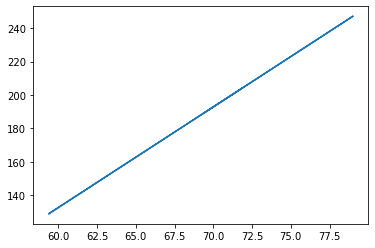

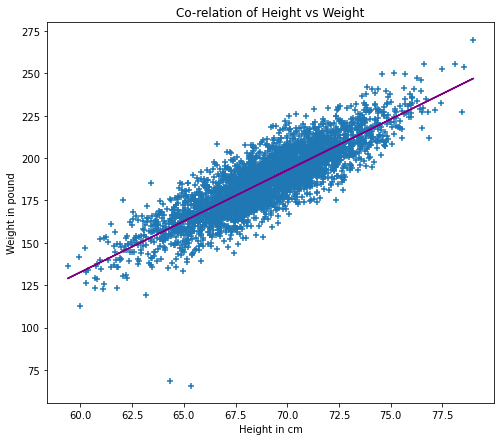

In [42]:
plt.plot(xtest, lr.predict(xtest))
plt.figure(figsize=(8,7))
plt.scatter(df['Height'], df['Weight'], marker='+')
plt.plot(xtest, lr.predict(xtest), color='purple')
plt.xlabel('Height in cm')
plt.ylabel('Weight in pound')
plt.title('Co-relation of Height vs Weight')

# Accuracy Check

In [46]:
lr.score(xtest, ytest)

0.7290236601425448

# Accuracy for whole dataset

In [47]:
lr.score(df[['Height']], df.Weight)

0.7322600156248238

# Training Accuracy

In [49]:
lr.score(xtrain, ytrain)

0.7363714990760972